In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10


def evaluate_historical_volatility(data):
    close = np.array(data['Close'])
    change = np.zeros(len(close)-1)
    for i in range(1, len(close)):
        change[i-1] = (close[i]-close[i-1])/close[i-1]
    return np.round(np.std(change)*(252**0.5), 5)


def bsm_option_prices(s0, K , T, r, sig, t0):
    d1 = (np.log(s0 / K) + r * (T - t0) + 0.5 * sig * sig * (T - t0)) / (sig * np.sqrt(T - t0))
    d2 = (np.log(s0 / K) + r * (T - t0) - 0.5 * sig * sig * (T - t0)) / (sig * np.sqrt(T - t0))
    call = s0 * norm.cdf(d1) - np.exp(-r * (T - t0)) * K * norm.cdf(d2)
    put = -s0 * norm.cdf(-d1) + np.exp(-r * (T - t0)) * K * norm.cdf(-d2)
    return np.round(call, 5), np.round(put, 5)


def monthly_price_distribution(month_data):
    A = [1.0, 0.5, 1.6, 0.1]
    sig = evaluate_historical_volatility(month_data)
    s0, r, T, t = month_data.iloc[-1]['Close'], 0.05, 21*6, 0
    call_price, put_price = np.zeros(len(A)), np.zeros(len(A))
    for i, a in enumerate(A):
        call_price[i], put_price[i] = bsm_option_prices(s0, a*s0, T, r, sig, t)
    return sig, call_price, put_price


def solve_for_stock(stock_dir, stock_title, market, num_fig=0):
    data = pd.read_csv(stock_dir, usecols=['Date', 'Close'], index_col=False)
    print('\t\tStock : ' + stock_title + '\tMarket : ' + market)
    period = 21
    # PART A
    print('Part A')
    last_month_data = data.iloc[len(data) - period:]
    print("Historical Volatility of last one month's data = ", end='')
    print(evaluate_historical_volatility(last_month_data))

    # PART B
    print('Part B')
    _sig, call_price, put_price = monthly_price_distribution(last_month_data)
    print('Call Prices for different K values = ', end='')
    print(call_price)
    print('Put Prices for different K values= ', end='')
    print(put_price)
    print('')

    # PART C
    start = len(data) - period
    volatility = []
    call_prices = []
    put_prices = []

    while start > 0:
        month_data = data[start:]
        sig, c, p = monthly_price_distribution(month_data)
        volatility.append(sig)
        call_prices.append(c[0])
        put_prices.append(p[0])
        start = start - period
    
    x = np.arange(1, len(volatility) + 1)
    y = np.array(volatility)
    z_call = np.array(call_prices)
    z_put = np.array(put_prices)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d') # Axe3D object
    ax.scatter(x, y, z_call, c='c', marker='o', label='Call Option')
    ax.scatter(x, y, z_put, c='g', marker='o', label='Put Option')

    ax.set_xlabel('Time (# of Months)')
    ax.set_ylabel('Volatility')
    ax.set_zlabel('Option Prices')
    ax.legend()
    plt.title(stock_title)
    plt.show()
    print("-"*100)


In [2]:
def main():
    for stock_title in os.listdir('stocks/BSE_SENSEX/'):
        solve_for_stock('stocks/BSE_SENSEX/' + stock_title, stock_title[:-7], 'BSE')
        
    print('#'*100)
    print("-"*100)
    for stock_title in os.listdir('stocks/NSE_NIFTY/'):
        solve_for_stock('stocks/NSE_NIFTY/' + stock_title, stock_title[:-7], 'NSE')


		Stock : AXISBANK	Market : BSE
Part A
Historical Volatility of last one month's data = 0.23192
Part B
Call Prices for different K values = [618.75041 619.25754 618.17265 619.68747]
Put Prices for different K values= [0.08857 0.02662 0.19369 0.0013 ]



c:\users\devg1\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\devg1\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\devg1\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0


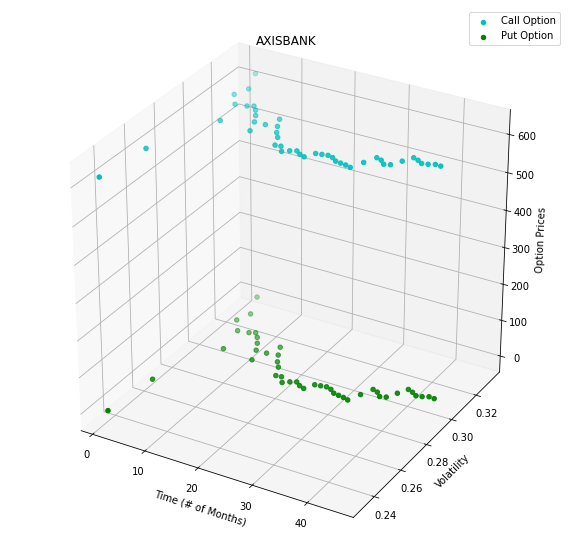

----------------------------------------------------------------------------------------------------
		Stock : HDFC	Market : BSE
Part A
Historical Volatility of last one month's data = 0.2393
Part B
Call Prices for different K values = [1966.73215 1968.30082 1964.9572  1969.64424]
Put Prices for different K values= [0.34968 0.10958 0.74524 0.00599]



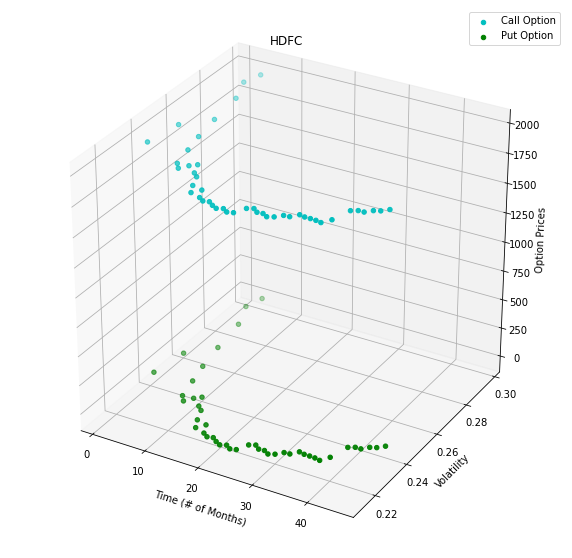

----------------------------------------------------------------------------------------------------
		Stock : ICICIBANK	Market : BSE
Part A
Historical Volatility of last one month's data = 0.20221
Part B
Call Prices for different K values = [359.35569 359.67352 358.98422 359.934  ]
Put Prices for different K values= [0.01676 0.00406 0.04193 0.00011]



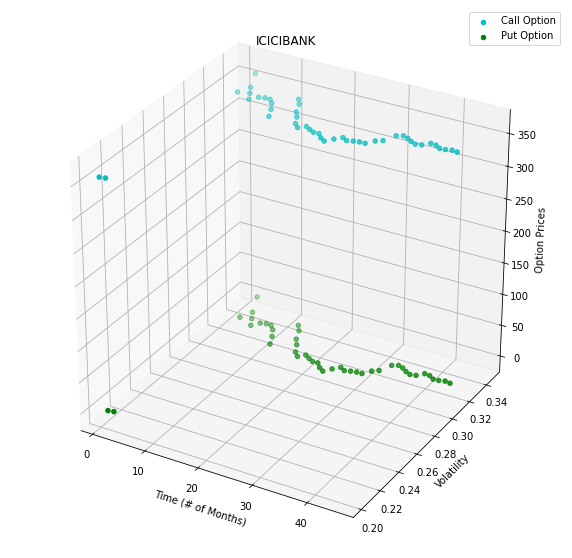

----------------------------------------------------------------------------------------------------
		Stock : ITC	Market : BSE
Part A
Historical Volatility of last one month's data = 0.18462
Part B
Call Prices for different K values = [281.13801 281.39245 280.83707 281.59829]
Put Prices for different K values= [5.210e-03 1.050e-03 1.459e-02 2.000e-05]



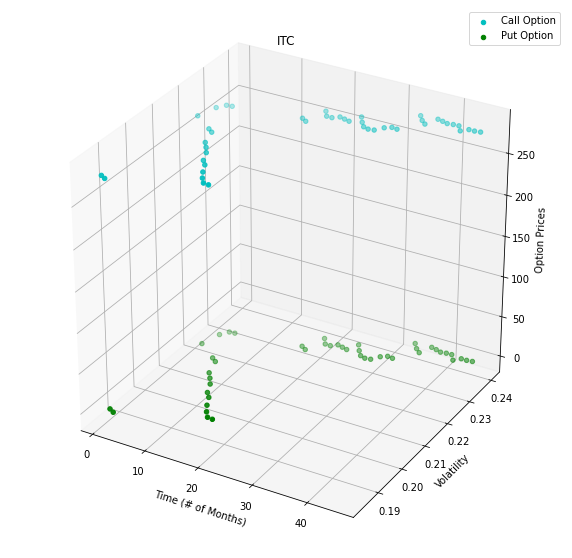

----------------------------------------------------------------------------------------------------
		Stock : LT	Market : BSE
Part A
Historical Volatility of last one month's data = 0.2056
Part B
Call Prices for different K values = [1435.93645 1437.19868 1434.46509 1438.23642]
Put Prices for different K values= [0.07797 0.01944 0.19153 0.00057]



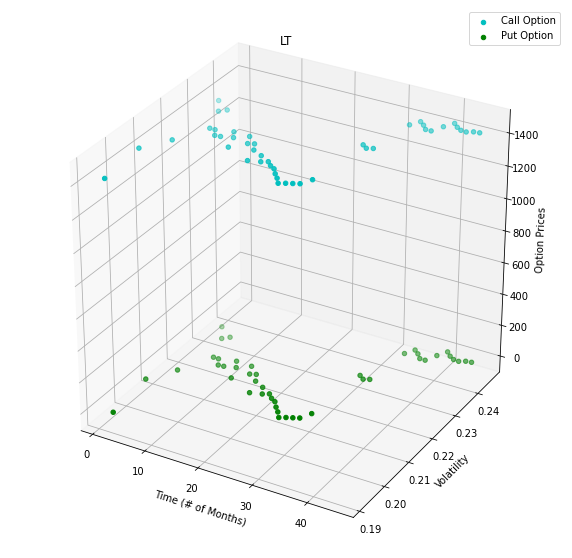

----------------------------------------------------------------------------------------------------
		Stock : RELIANCE	Market : BSE
Part A
Historical Volatility of last one month's data = 0.23301
Part B
Call Prices for different K values = [1119.15708 1120.07086 1118.11707 1120.84668]
Put Prices for different K values= [0.16562 0.05011 0.36077 0.00249]



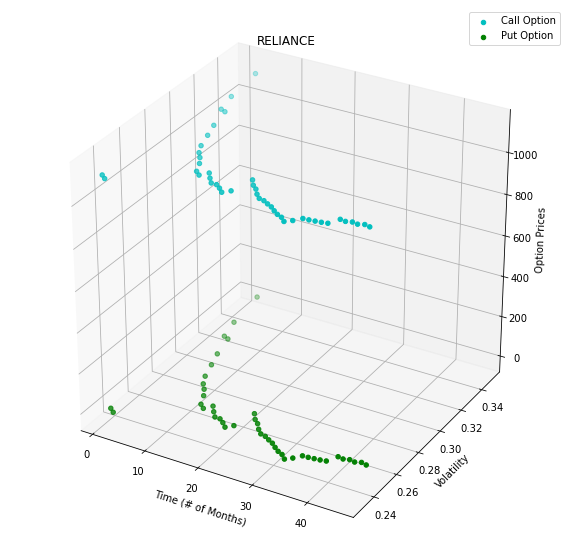

----------------------------------------------------------------------------------------------------
		Stock : SUNPHARMA	Market : BSE
Part A
Historical Volatility of last one month's data = 0.49064
Part B
Call Prices for different K values = [430.58659 430.6104  430.56338 430.63734]
Put Prices for different K values= [0.7274  0.35581 1.17867 0.06643]



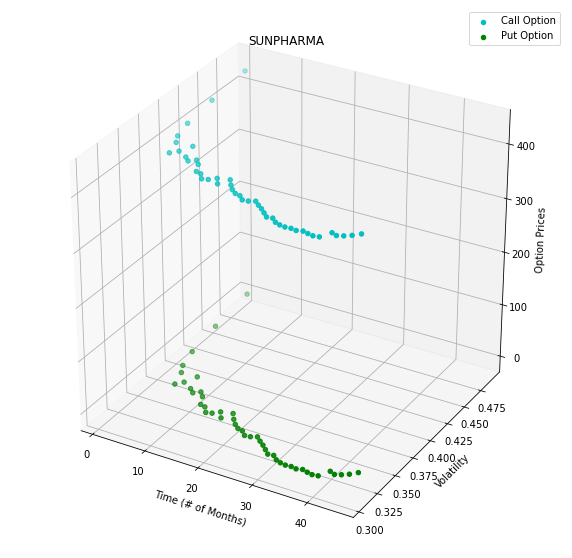

----------------------------------------------------------------------------------------------------
		Stock : TATAMOTORS	Market : BSE
Part A
Historical Volatility of last one month's data = 0.33629
Part B
Call Prices for different K values = [172.43649 172.50709 172.36277 172.57666]
Put Prices for different K values= [0.15343 0.06556 0.26988 0.00835]



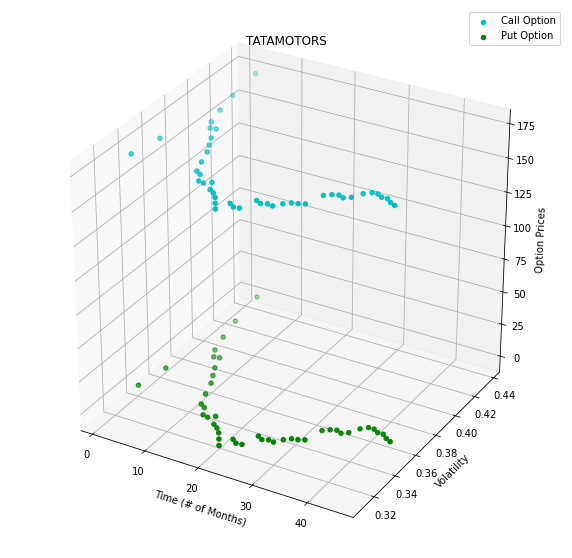

----------------------------------------------------------------------------------------------------
		Stock : TCS	Market : BSE
Part A
Historical Volatility of last one month's data = 0.17299
Part B
Call Prices for different K values = [1890.08928 1891.81433 1888.03692 1893.20237]
Put Prices for different K values= [1.636e-02 2.840e-03 5.029e-02 3.000e-05]



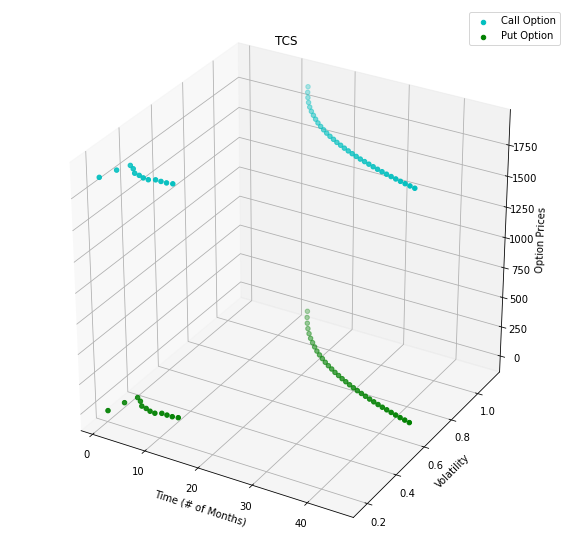

----------------------------------------------------------------------------------------------------
		Stock : WIPRO	Market : BSE
Part A
Historical Volatility of last one month's data = 0.27367
Part B
Call Prices for different K values = [247.32968 247.49574 247.14762 247.64541]
Put Prices for different K values= [0.0965  0.03515 0.18735 0.00289]



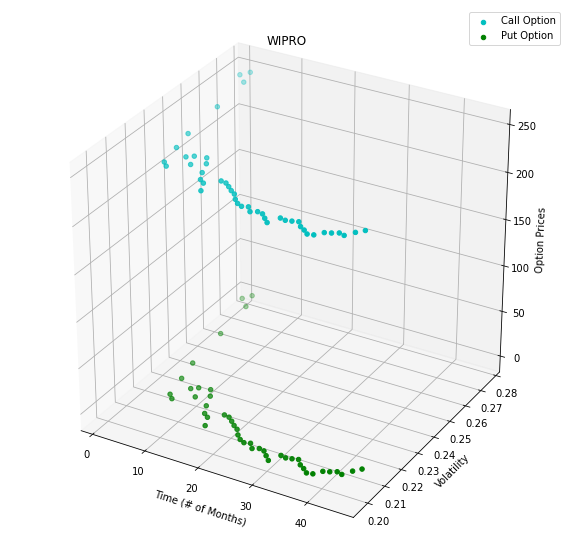

----------------------------------------------------------------------------------------------------
####################################################################################################
----------------------------------------------------------------------------------------------------
		Stock : AXISBANK	Market : NSE
Part A
Historical Volatility of last one month's data = 0.24613
Part B
Call Prices for different K values = [618.8939  619.37377 618.35437 619.78877]
Put Prices for different K values= [0.1322  0.04291 0.27566 0.00258]



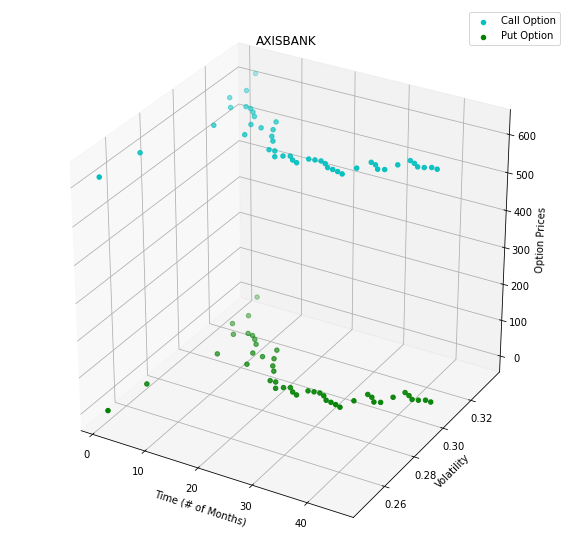

----------------------------------------------------------------------------------------------------
		Stock : HDFC	Market : NSE
Part A
Historical Volatility of last one month's data = 0.24345
Part B
Call Prices for different K values = [1965.12681 1966.66805 1963.38962 1967.9958 ]
Put Prices for different K values= [0.39132 0.12532 0.82283 0.00727]



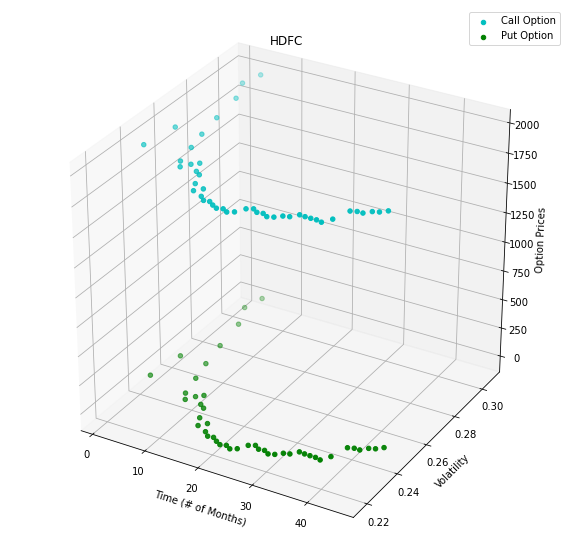

----------------------------------------------------------------------------------------------------
		Stock : ICICIBANK	Market : NSE
Part A
Historical Volatility of last one month's data = 0.19574
Part B
Call Prices for different K values = [359.50092 359.82212 359.12373 360.08392]
Put Prices for different K values= [1.227e-02 2.800e-03 3.189e-02 6.000e-05]



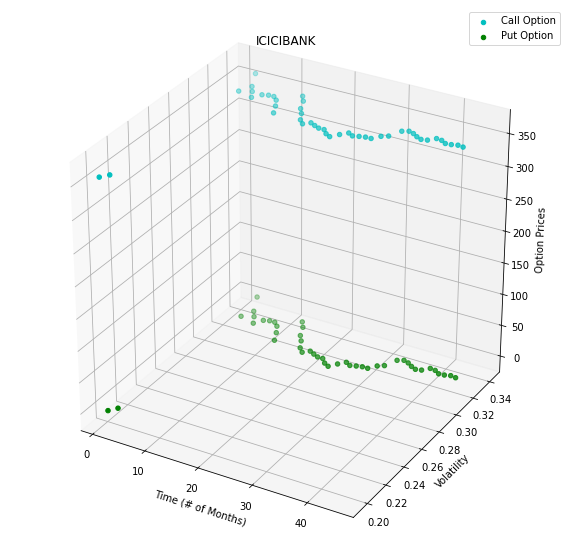

----------------------------------------------------------------------------------------------------
		Stock : ITC	Market : NSE
Part A
Historical Volatility of last one month's data = 0.17765
Part B
Call Prices for different K values = [281.13616 281.39202 280.8324  281.59828]
Put Prices for different K values= [3.36e-03 6.20e-04 9.92e-03 1.00e-05]



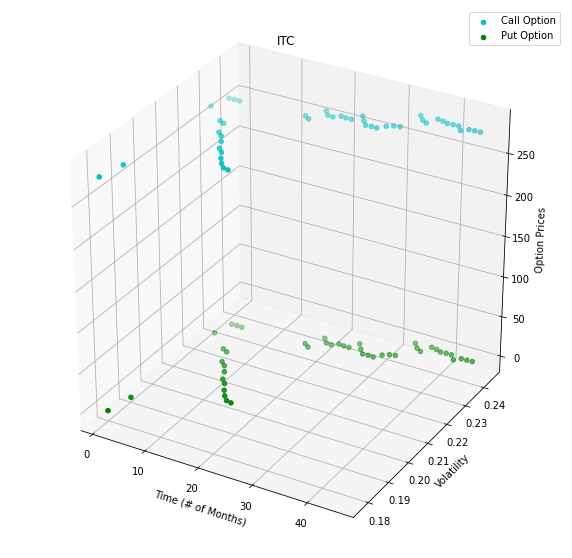

----------------------------------------------------------------------------------------------------
		Stock : LT	Market : NSE
Part A
Historical Volatility of last one month's data = 0.21623
Part B
Call Prices for different K values = [1435.03043 1436.26274 1433.60659 1437.28727]
Put Prices for different K values= [0.12016 0.03258 0.28019 0.0012 ]



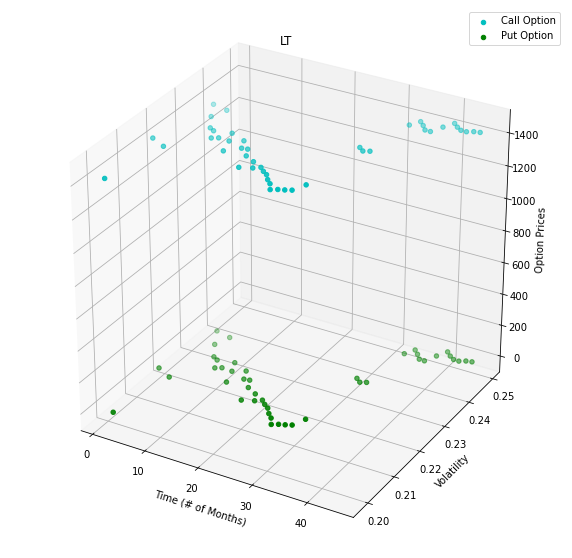

----------------------------------------------------------------------------------------------------
		Stock : RELIANCE	Market : NSE
Part A
Historical Volatility of last one month's data = 0.22796
Part B
Call Prices for different K values = [1119.33242 1120.26201 1118.26951 1121.046  ]
Put Prices for different K values= [0.14138 0.04149 0.31384 0.0019 ]



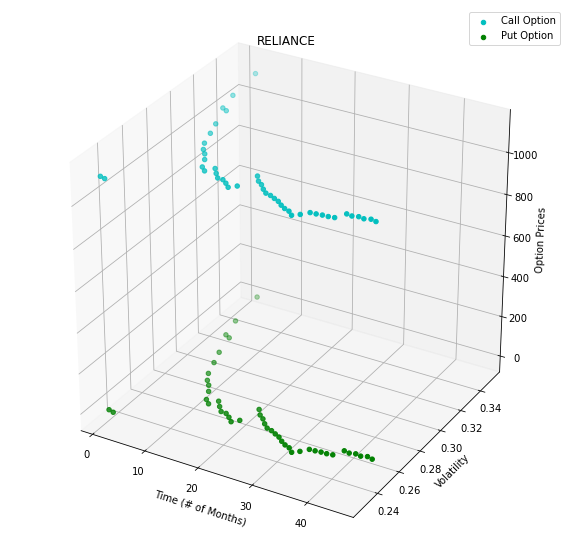

----------------------------------------------------------------------------------------------------
		Stock : SUNPHARMA	Market : NSE
Part A
Historical Volatility of last one month's data = 0.50032
Part B
Call Prices for different K values = [430.44544 430.46579 430.42564 430.48895]
Put Prices for different K values= [0.73597 0.36105 1.19049 0.068  ]



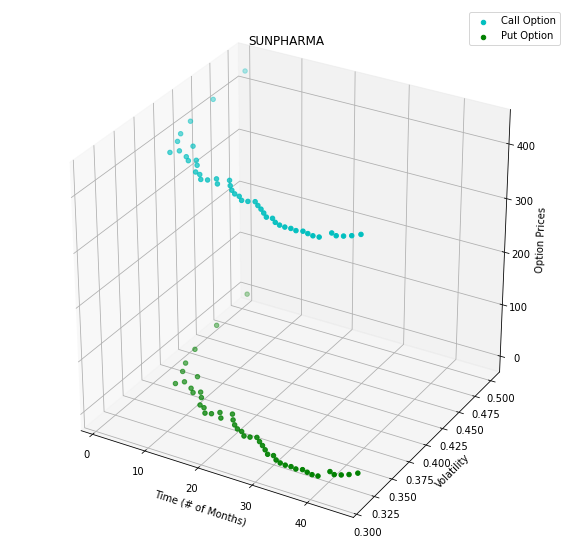

----------------------------------------------------------------------------------------------------
		Stock : TATAMOTORS	Market : NSE
Part A
Historical Volatility of last one month's data = 0.34187
Part B
Call Prices for different K values = [172.54407 172.61098 172.47445 172.67738]
Put Prices for different K values= [0.1612  0.06955 0.28187 0.0091 ]



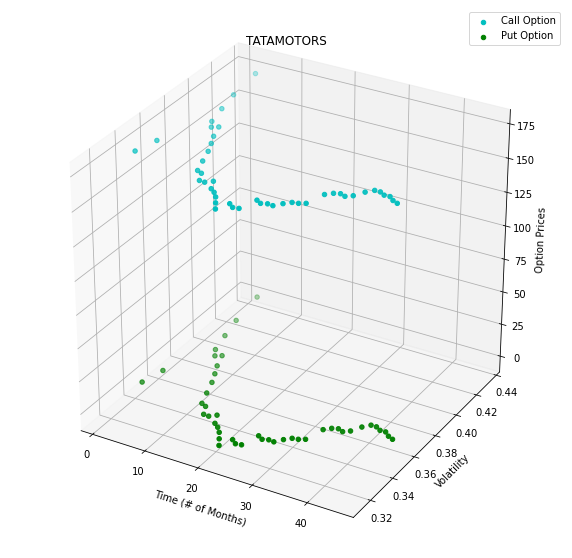

----------------------------------------------------------------------------------------------------
		Stock : TCS	Market : NSE
Part A
Historical Volatility of last one month's data = 0.17549
Part B
Call Prices for different K values = [1889.59334 1891.31545 1887.54676 1892.70247]
Put Prices for different K values= [1.951e-02 3.510e-03 5.866e-02 4.000e-05]



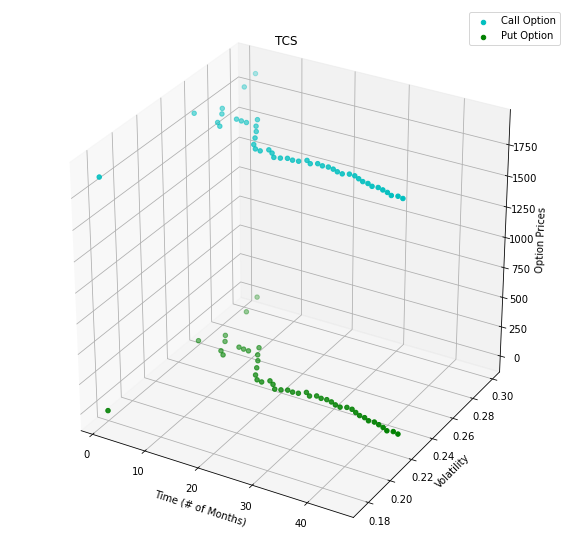

----------------------------------------------------------------------------------------------------
		Stock : WIPRO	Market : NSE
Part A
Historical Volatility of last one month's data = 0.24867
Part B
Call Prices for different K values = [247.73777 247.92771 247.52473 248.09258]
Put Prices for different K values= [0.05644 0.01854 0.11679 0.00115]



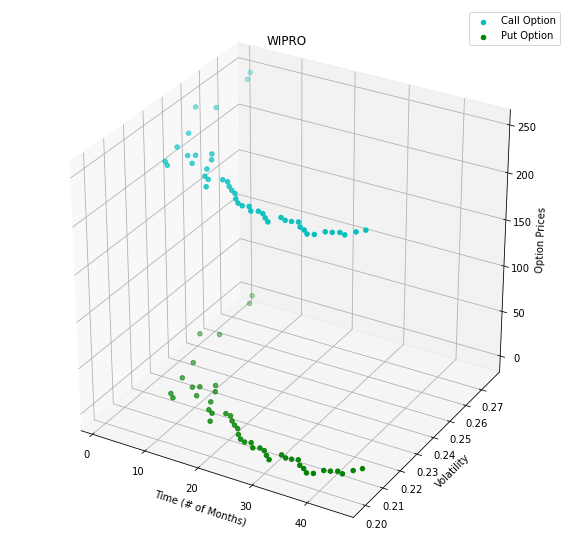

----------------------------------------------------------------------------------------------------


In [3]:
main()